### Authentication:

# TruePrice Data Retrieval

#### Prerequisites

- Ensure you have Python 3 installed.
- Install the `requests` library if it’s not already installed:
    ```bash
    pip install requests
    ```
- You will need API credentials (email and password) to authenticate and obtain an access token for secure requests.

#### Authentication API

#### Endpoint
**POST** `https://truepriceenergy.com/login`

#### Description
This endpoint is used to authenticate a user and retrieve an access token for secure API requests.

#### Request Parameters
| Parameter   | Type   | Required | Description                     |
|-------------|--------|----------|---------------------------------|
| `email`     | string | Yes      | The email address of the user. |
| `password`  | string | Yes      | The password of the user.      |

##### Example Request


In [ ]:
import csv
import requests

def login(email = "email@truelightenergy.com", password = "password"):
    url = "https://truepriceenergy.com/login"
    querystring = {"email":email,"password":password}
    response = requests.request("POST", url, params=querystring, verify=False)
    return response.text


In [ ]:
response = login("email@truelightenergy.com", "password")
print(response)

In [ ]:
print(f"→ Access Token: {response}")

#### **Endpoint**
**GET** `https://truepriceenergy.com/get_data`

##### **Description**
This endpoint retrieves data from the True Price Energy API based on the specified parameters. The response is saved as a CSV file.

---

##### **Request Parameters**

| Parameter       | Type    | Required | Description                                                                 |
|-----------------|---------|----------|-----------------------------------------------------------------------------|
| `access_token`  | string  | Yes      | The access token for authentication.                                        |
| `start_date`    | string  | Yes      | The start date for the data retrieval in `YYYY-MM-DD` format.              |
| `end_date`      | string  | Yes      | The end date for the data retrieval in `YYYY-MM-DD` format.                |
| `operating_day` | string  | No       | The operating day for the data retrieval in `YYYY-MM-DD` format.           |
| `offset`        | string  | No       | Offset value for pagination or filtering.                                   |
| `curve`         | string  | Yes      | The type of curve (e.g., `energy`, `nonenergy`, `rec`).                    |
| `iso`           | string  | Yes      | The ISO region (e.g., `isone`, `pjm`, `ercot`, `nyiso`, `miso`).           |
| `strip`         | string  | No       | The strip type (e.g., `standardized`, `unstandardized`).                              |
| `history`       | boolean | No       | Whether to include historical data (`True` or `False`).                    |
| `type`          | string  | Yes      | The response format (e.g., `csv`,`xlsx`).                                         |

---

##### **Headers**

| Header           | Value                          |
|------------------|--------------------------------|
| `Authorization`  | `Bearer <access_token>`        |

---

#### **Example Request**



Data Upload Schedule:

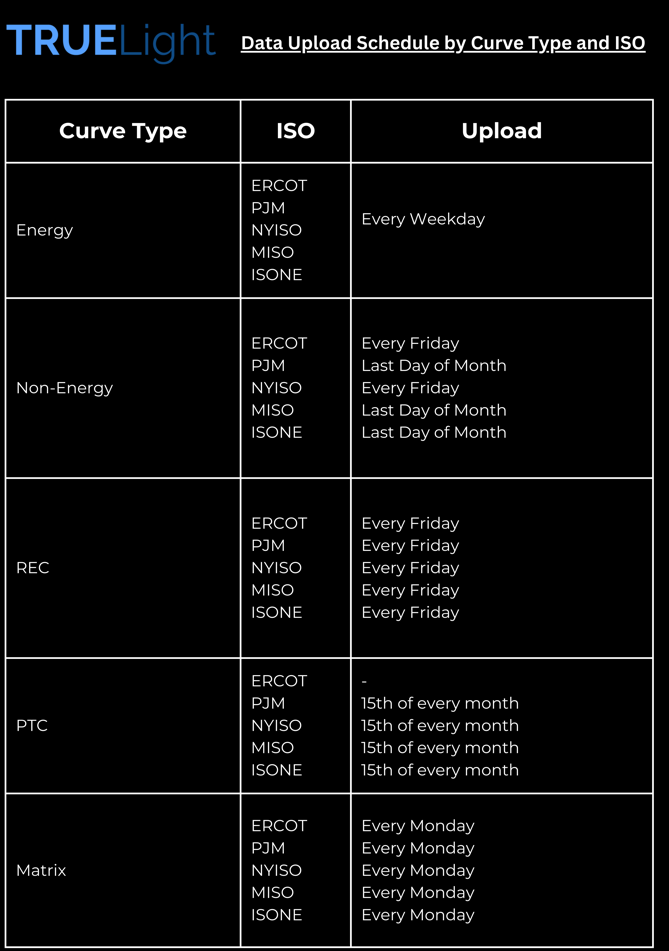

Download Data:

In [ ]:
#Function to get data from True Price Energy API:


def get_data(access_token, start_date, end_date, operating_day,curve, iso, strip, history, type):
    
    url = "https://truepriceenergy.com/get_data"
    querystring = {
        "start": start_date,
        "end": end_date,
        "operating_day": operating_day,
        "curve_type": curve,
        "iso": iso,
        "strip": strip,
        "history": history,
        "type": type
    }
    headers = {"Authorization": f"Bearer {access_token}"}
    
    # Make the API request
    response = requests.request("GET", url, params=querystring, headers=headers, verify=False)
    
    # Save the response content as a CSV file
    file_name = f"{curve}_{iso}.csv"
    with open(file_name, "wb") as file:
        file.write(response.content)
    
    print(f"Data saved to {file_name}")
    return response





In [ ]:
access_token = eval(login())["access_token"]

In [ ]:
print(access_token)

Example:

Downloading Energy Curves In all the ISO's:

ENERGY Curves: 

In [ ]:
# Energy_ERCOT
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "energy", "ercot","standardized", False, "csv")

In [ ]:
#Energy_ISONE
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "energy", "isone","standardized", False, "csv")

In [ ]:
#Energy_NYISO
data = get_data(access_token, "2025-04-01", "2030-04-11", "", "", "energy", "nyiso","standardized", False, "csv")

In [ ]:
#Energy_MISO
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "energy", "miso","standardized", False, "csv")

In [ ]:
#Energy_PJM
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "energy", "pjm","standardized", False, "csv")

Non-Energy:

In [ ]:
# Non-Energy_ERCOT
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "nonenergy", "ercot","standardized", False, "csv")

In [ ]:
#Non-Energy_ISONE
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "nonenergy", "isone","standardized", False, "csv")

In [ ]:
#Non-Energy_NYISO
data = get_data(access_token, "2025-04-01", "2030-04-11", "", "", "nonenergy", "nyiso","standardized", False, "csv")

In [ ]:

#Non-Energy_MISO
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "nonenergy", "miso","standardized", False, "csv")


In [ ]:
#Non-Energy_PJM
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "nonenergy", "pjm","standardized", False, "csv")

REC:

In [ ]:
#REC_ERCOT
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "rec", "ercot",['7x24'], False, "csv")

In [ ]:
#REC_ISONE
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "rec", "isone",['7x24'], True, "csv")

In [ ]:
#REC_NYISO
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "rec", "nyiso",['7x24'], False, "csv")


In [ ]:
#REC_PJM
data = get_data(access_token, "2000-01-01", "9999-12-31", "", "", "rec", "pjm",['7x24'], False, "csv")

PTC:

In [ ]:
#ISONE:
data = get_data(access_token, "2025-06-01", "2030-06-01","2025-05-15", "ptc", "isone","standardized", False, "csv")

In [ ]:
#NYISO:
data = get_data(access_token, "2025-01-01", "2030-01-06","2025-05-15", "ptc", "nyiso","standardized", False, "csv")

In [ ]:
#PJM:
data = get_data(access_token, "2023-05-01", "2030-05-01","2025-05-15", "ptc", "pjm","standardized","", "csv")

In [ ]:
#MISO:
data = get_data(access_token, "2025-03-01", "2030-03-01","2025-05-15", "ptc", "miso","standardized","", "csv")